📌 Project Title:
Clustering Instagram Users Based on Visit Patterns and Spending Behavior


🔍 Introduction
In this project, we work with a real-world dataset of Instagram usage and spending behavior https://www.kaggle.com/datasets/chaandsheikh/instagram-visit-clustering. We guide you through a complete Unsupervised Machine Learning pipeline — from data exploration and preprocessing to applying and comparing various clustering algorithms.

As social media platforms grow, understanding user behavior becomes critical for targeted marketing, content recommendation, and engagement strategies. This project aims to group Instagram users into meaningful clusters based on their visit frequency and spending rank.


🎯 Objective
The main objective is to apply and compare the performance of various clustering algorithms to uncover distinct user segments. The clustering methods explored include:

K-Means Clustering

K-Medoids Clustering

Agglomerative Clustering (Single Linkage)

Agglomerative Clustering (Complete Linkage)

These techniques will help identify behavioral groups of Instagram users — such as high-spenders, frequent visitors, and occasional users — without any labeled data.

<h1>🔍 Clustering</h1>

Clustering is an unsupervised machine learning technique used to group similar data points together based on patterns or similarities in their features.

🛠️ Types of Clustering Algorithms:
<ul>
<li>K-Means -	Assigns data to clusters based on the nearest mean (centroid)</li>
<li>K-Medoids -	Similar to K-Means but uses real data points as centers (medoids)</li>
<li>Hierarchical -	Builds a tree of clusters using linkage (e.g., single/complete linkage)</li>
</ul>

<h1>K-Means Clustering</h1>

<p>K-means clustering is an unsupervised machine learning algorithm used to group similar data points into clusters. It’s widely used in pattern recognition, image compression, market segmentation, and more.</p>

<h5>🧠 How K-means Clustering Works:</h5>
<ul>
<li>Choose the number of clusters (K):</li>
You decide how many clusters you want to divide the data into.

<li>Initialize centroids:</li>
K points are randomly selected as the initial cluster centers (called centroids).

<li>Assign each point to the nearest centroid:</li>
Based on distance (usually Euclidean), each data point is assigned to the closest cluster.

<li>Update centroids:</li>
For each cluster, compute the new centroid as the mean of all the points assigned to that cluster.

<li>Repeat steps 3–4:</li>
Continue updating clusters and centroids until assignments no longer change or a maximum number of iterations is reached.
</ul>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Read CSV file 
data = pd.read_csv("/Users/pravaliparvataneni/Downloads/Instagram visits clustering.csv") 
#drop unwanted column
data = data.drop('User ID', axis=1)

In [2]:
data.head()

,Instagram visit score,Spending_rank(0 to 100)
0,63,24.050708
1,61,25.223290
2,104,18.528245
3,82,86.890232
4,14,31.492397


In [3]:
# Optional - Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

<h5>Why elbow method:</h5>
<p>K-means requires you to manually choose K, but if you pick too few or too many clusters, the results might not be meaningful. The Elbow Method helps you find a "sweet spot" where increasing K further doesn’t improve the clustering significantly.</p>

📉 How It Works:
<ul>
<li>Run K-means for different values of K (e.g., K = 1 to 10).</li>
<li>Calculate the Within-Cluster Sum of Squares (WCSS) for each K.</li>
WCSS measures how close data points are to their assigned cluster centroids (lower is better).
<li>Plot K vs. WCSS.</li>
<li>Look for an "elbow" point on the graph:</li>
    It’s where the rate of decrease sharply slows down.
    That point is the optimal K — adding more clusters beyond that yields diminishing returns.
</ul>

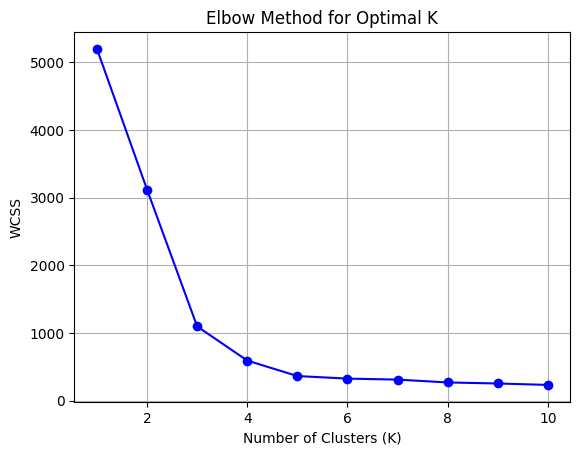

In [4]:
# Use Elbow Method to find optimal K
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, 'bo-')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid()
plt.show()


<p>From the Elbow plot, we observe that the WCSS significantly decreases from K = 1 to K = 3, and the rate of decrease slows down from K = 4 onwards. This suggests that K = 3 is the optimal number of clusters, as increasing K beyond this point provides diminishing returns."</p>

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

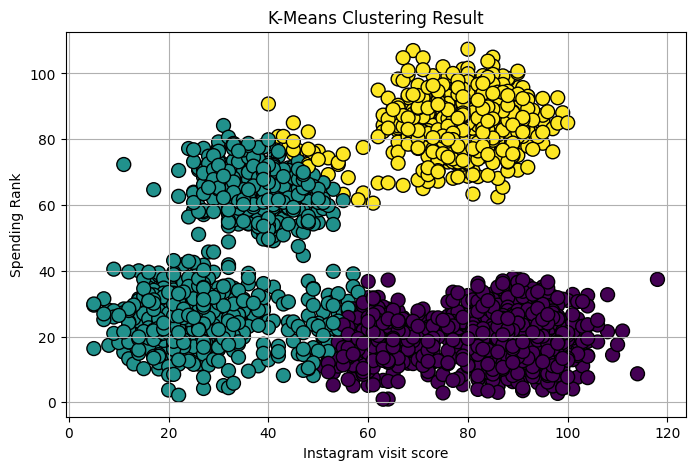

   Instagram visit score  Spending_rank(0 to 100)  Cluster
0                     63                24.050708        0
1                     61                25.223290        0
2                    104                18.528245        0
3                     82                86.890232        2
4                     14                31.492397        1


In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Instagram visit score'], data['Spending_rank(0 to 100)'],
            c=data['Cluster'], cmap='viridis', s=100, edgecolor='k')
plt.title("K-Means Clustering Result")
plt.xlabel("Instagram visit score")
plt.ylabel("Spending Rank")
plt.grid()
plt.show()

print(data.head())

<h5>📊 Observations from the Plot:</h5>
<p>Three Clusters Identified:
The scatter plot is color-coded by the Cluster label, indicating that 3 distinct clusters have been formed using K-Means.
Colors represent each cluster (likely via the viridis colormap).</p>
<ul>
Cluster Distribution:

Cluster 1 (Top-Right, Yellow):
These users are very active on Instagram and also spend a lot. They could be ideal targets for marketing campaigns.

Cluster 2 (Middle-Left, Greenish-Blue):
These users spend moderately but aren’t as active on Instagram. They may need more engagement to increase Instagram usage.

Cluster 3 (Bottom-Right, Dark Blue):
These users are highly engaged on Instagram but don’t spend much. Could be influencers, students, or low-income users.
</ul>

<h1>K-Medoids Clustering</h1>

<p>K-medoids clustering is a partitioning-based clustering algorithm similar to K-means, but with a key difference:
Instead of using the mean (centroid) of the data points to represent a cluster (as in K-means), K-medoids uses an actual data point (called a medoid) that is the most centrally located in the cluster.</p>

📌 How K-medoids Works:
<ul>
<li>Choose the number of clusters (K).</li>

<li>Initialize: Randomly select K actual data points as medoids.</li>

<li>Assign points: Assign each data point to the nearest medoid.</li>

<li>Update medoids:
For each cluster, choose the data point that minimizes the total distance to all other points in the cluster as the new medoid.</li>
<li>Repeat steps 3 and 4 until medoids no longer change or a stopping condition is met.</li>
</ul>

In [7]:
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

# ---------- Step 1: Load data using pandas ----------
def load_data(file_path):
    df = pd.read_csv(file_path)
    data = df.iloc[:, 1:3].values.tolist()  # Use columns 1 and 2 (ignore ID)
    return df, data

# ---------- Step 2: Define helper functions ----------
def euclidean_distance(p1, p2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(p1, p2)))

def total_cost(cluster, medoid):
    return sum(euclidean_distance(point, medoid) for point in cluster)

# ---------- Step 3: K-Medoids algorithm ----------
def k_medoids(data, k, max_iter=100):
    medoids = random.sample(data, k)

    for _ in range(max_iter):
        clusters = [[] for _ in range(k)]
        labels = []
        for point in data:
            distances = [euclidean_distance(point, medoid) for medoid in medoids]
            nearest_idx = distances.index(min(distances))
            clusters[nearest_idx].append(point)
            labels.append(nearest_idx)

        new_medoids = []
        for cluster in clusters:
            if not cluster:
                new_medoids.append(random.choice(data))
                continue
            min_cost = float('inf')
            best_medoid = cluster[0]
            for candidate in cluster:
                cost = total_cost(cluster, candidate)
                if cost < min_cost:
                    min_cost = cost
                    best_medoid = candidate
            new_medoids.append(best_medoid)

        if new_medoids == medoids:
            break
        medoids = new_medoids

    return medoids, clusters, labels

# ---------- Step 4: Run ----------
file_path = '/Users/pravaliparvataneni/Downloads/Instagram visits clustering.csv'
df, data_points = load_data(file_path)

k = 3
medoids, clusters, labels = k_medoids(data_points, k)

# Add cluster labels to original DataFrame
df['Cluster'] = labels


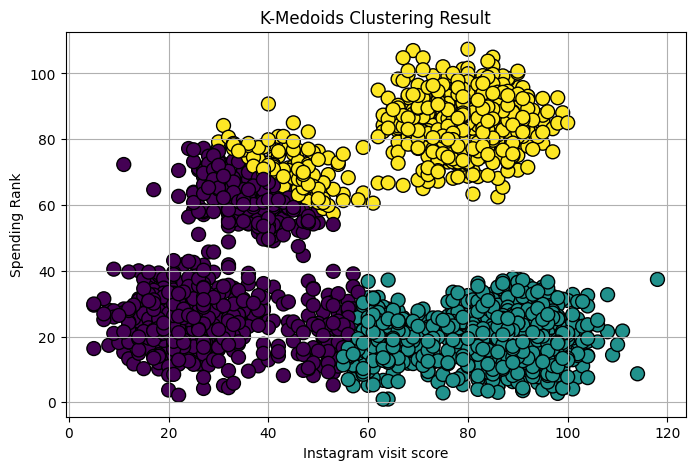

   User ID  Instagram visit score  Spending_rank(0 to 100)  Cluster
0        0                     63                24.050708        1
1        1                     61                25.223290        1
2        2                    104                18.528245        1
3        3                     82                86.890232        2
4        4                     14                31.492397        0


In [8]:
# ---------- Step 5: Plot ----------
plt.figure(figsize=(8, 5))
plt.scatter(df['Instagram visit score'], df['Spending_rank(0 to 100)'],
            c=df['Cluster'], cmap='viridis', s=100, edgecolor='k')
plt.title("K-Medoids Clustering Result")
plt.xlabel("Instagram visit score")
plt.ylabel("Spending Rank")
plt.grid()
plt.show()

# Preview labeled data
print(df.head())


🟣 Cluster 0 (Purple):
<ul>
<li>High Instagram Visit Score (60–120)</li>
<li>High Spending Rank (60–100)</li>
<li>These are the ideal customers — active and high spenders.
Likely to be influencers, brand loyalists, or engaged shoppers</li>
</ul>

🟢 Cluster 1 (Green):
<ul>
<li>Low to Medium Instagram Visit Score (0–60)</li>
<li>Mixed Spending Rank (20–70)</li>
<li>These users spend moderately but are not highly engaged on Instagram.</li>
</ul>

🟡  Cluster 2 (Yellow):
<ul>
<li>High Instagram Visit Score (60–120)</li>
<li>Low Spending Rank (0–40)</li>
<li>These users are very active on Instagram, but spend less.</li>
</ul>

<h1>Agglomerative Clustering</h1>

<p>Agglomerative Clustering is a type of hierarchical clustering that builds clusters bottom-up — by starting with each data point as its own cluster, and merging the closest clusters step by step until only one cluster remains (or a stopping condition is met).</p>


🔁 How Agglomerative Clustering Works:
<ol>
<li>Start: Each data point is its own cluster (N clusters for N points).</li>

<li>Measure distance between all clusters (using a chosen linkage method).</li>

<li>Merge the two closest clusters.</li>

<li>Repeat steps 2–3 until:

A desired number of clusters is reached, or
All data points are merged into one big cluster.</li>
</ol>

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv("/Users/pravaliparvataneni/Downloads/Instagram visits clustering.csv")  # Replace with your actual file path
data = data.drop("User ID", axis=1)

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [12]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  # You can change linkage
data['Cluster'] = model.fit_predict(scaled_data)

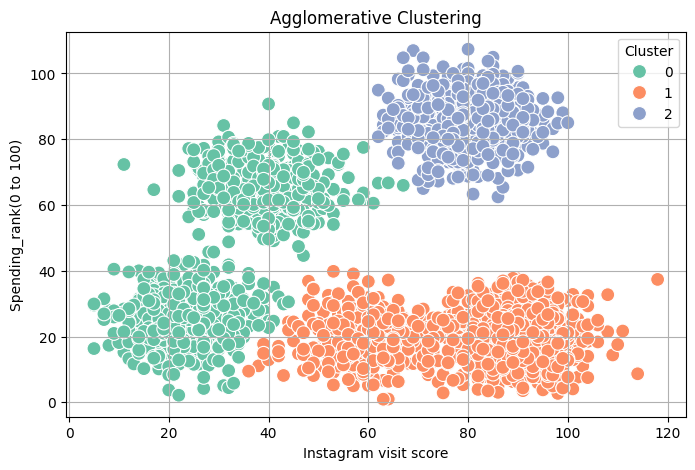

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=data['Instagram visit score'],
    y=data['Spending_rank(0 to 100)'],
    hue=data['Cluster'],
    palette='Set2',
    s=100
)
plt.title("Agglomerative Clustering")
plt.grid(True)
plt.show()


🟢 Cluster 0 (Green):
<ul>
<li>Low Instagram Visit Score (0–50)</li>
<li>Low to Medium Spending Rank (10–70)</li>
<li>Users here are less active on Instagram and spend moderately.</li>
</ul>

🔴 Cluster 1 (Red/Orange):
<ul>
<li>High Instagram Visit Score (50–120)</li>
<li>Low Spending Rank (0–40)</li>
<li>Highly active users with low spending.</li>
</ul>

🔵 Cluster 2 (Blue):
<ul>
<li>Medium to High Instagram Visit Score (50–120)</li>
<li>High Spending Rank (60–100)</li>
<li>These are your power users — active and big spenders.</li>
</ul>

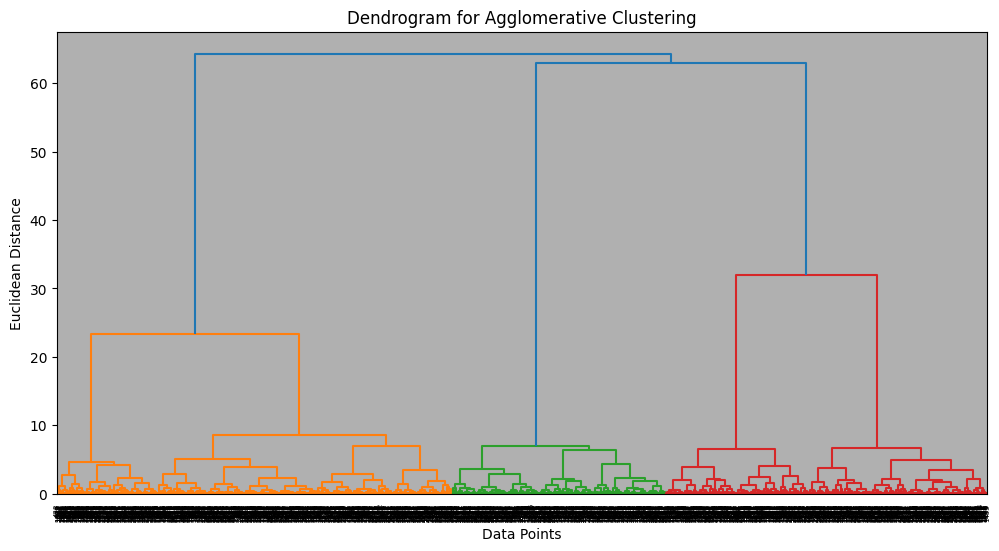

In [14]:
linked = linkage(scaled_data, method='ward')  # 'ward' is commonly used
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

<p>Dendrogram helps visualize how data points are hierarchically merged based on their similarity (distance).</p>
📊 What This Dendrogram Shows:
<ul>
<li>The x-axis represents individual data points (or clusters of points).</li>

<li>The y-axis (Euclidean Distance) represents the distance between clusters when they are merged.</li>

<li>The vertical lines indicate where clusters are merged.</li>

<li>The height of these vertical lines shows how dissimilar the merged clusters are — the taller the line, the more different the clusters were.</li>
</ul>

📌 Interpretation:
<ul>
<li>The clusters below that cut are compact and similar, which means:

<li>Users within each cluster are similar in terms of Instagram visit score and spending rank.</li>

<li>Clusters are meaningfully separated — each group has distinct characteristics.</li>

<li>If you cut the dendrogram at a lower height, you'd get more clusters, but they might be too granular or overfitted.</li>
</ul>

<h1>Agglomerative Hierarchical Clustering using Single Linkage</h1>

📊 What is Single Linkage?
<p>
In single linkage clustering, the distance between two clusters is defined as the shortest distance between any two points in each cluster.

It's sensitive to outliers and can lead to a "chaining effect", where clusters might become elongated or loosely connected.</p>

🧠 Algorithm Steps:
<ul>
<li>Initialize:

<li>Treat each data point as its own cluster → n clusters.</li>

<li>Compute Initial Distance Matrix:

<li>Calculate pairwise distances between all data points.</li>

<li>Repeat until the number of clusters = K:

a. Find the closest two clusters:

Use single linkage → the minimum distance between any two points in different clusters.

b. Merge the two closest clusters into a single cluster.

c. Update the distance matrix:

For the new cluster C_new formed by merging clusters A and B, calculate distance to another cluster X as:
𝐷(𝐶new,𝑋)=min(D(A,X),D(B,X))</li>

<li>Stop when only K clusters remain.</li>
</ul>


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [16]:
# Sample 1D data
data = pd.read_csv("/Users/pravaliparvataneni/Downloads/Instagram visits clustering.csv")  # Replace with your actual file path
data = data.drop("User ID", axis=1)

# Perform Hierarchical Clustering using Single Linkage
linked_single = linkage(data, method='single')

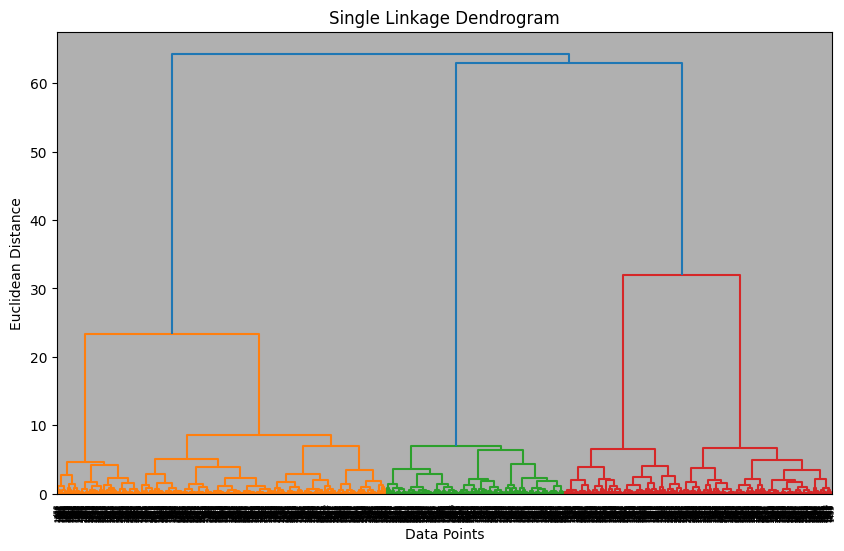

In [17]:
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Single Linkage Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

The dendrogram shows 3 large branches before merging at a very high distance (~60).

Large vertical jumps at the top indicate natural cluster separation.

Cutting the dendrogram around Euclidean distance ≈ 40–50 results in 3 main clusters (as I likely did using t=3 in fcluster()).

In [18]:
clusters_single = fcluster(linked_single, t=2, criterion='maxclust')
print("Sinlge Linkage Clusters:", clusters_single)

Sinlge Linkage Clusters: [1 1 1 ... 1 1 1]


In [19]:
clusters_single

array([1, 1, 1, ..., 1, 1, 1], shape=(2600,), dtype=int32)

<h1>Agglomerative Hierarchical Clustering using Complete Linkage</h1>

📊 What is Complete Linkage?

Complete linkage defines the distance between clusters as the maximum distance between any two points in different clusters.

This tends to create compact, evenly-sized, and well-separated clusters.



🧠 Algorithm Steps:
<ul>
<li>Initialize:

<li>Treat each data point as its own cluster → n clusters.</li>

<li>Compute Initial Distance Matrix:

<li>Calculate pairwise distances between all data points.</li>

<li>Repeat until the number of clusters = K:

a. Find the closest two clusters:

Use complete linkage → the maximum distance between any two points in different clusters.

b. Merge the two closest clusters into a single cluster.

c. Update the distance matrix:

For the new cluster C_new formed by merging clusters A and B, calculate distance to another cluster X as:
𝐷(𝐶new,𝑋)=max(D(A,X),D(B,X))</li>

<li>Stop when only K clusters remain.</li>
</ul>


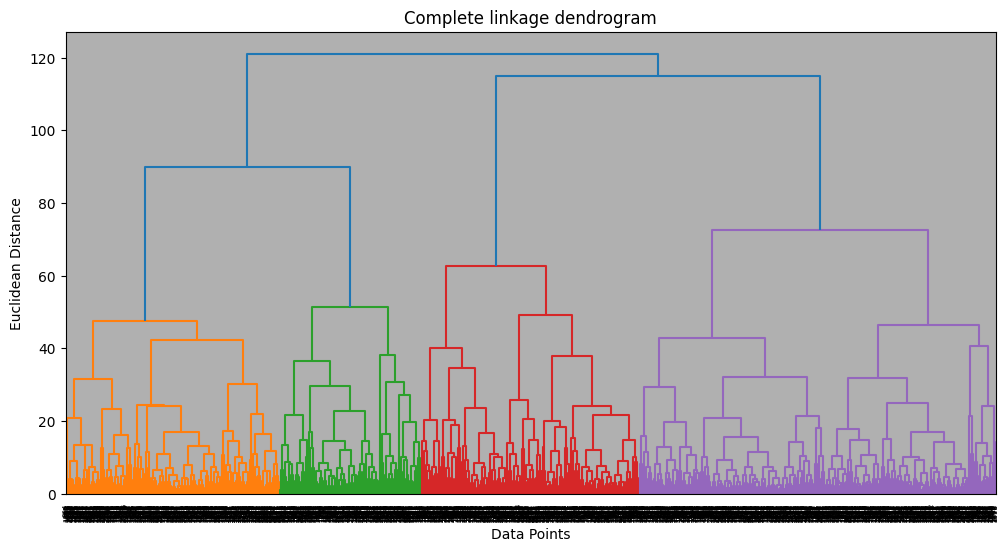

In [20]:
data = pd.read_csv("/Users/pravaliparvataneni/Downloads/Instagram visits clustering.csv")  # Replace with your actual file path
data = data.drop("User ID", axis=1)
# Perform Complete Linkage Clustering
linked_complete = linkage(data, method='complete')

linked = linked_complete
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Complete linkage dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

X-axis: Represents individual data points (users).

Y-axis: Shows Euclidean distance at which clusters are merged.

Color-coded branches: Indicate final clusters (you've used t=2 clusters).

The tall vertical jump near the top (~120) suggests two large clusters are well-separated.



In [21]:
clusters_complete = fcluster(linked_complete, t=2, criterion='maxclust')
print("Complete Linkage Clusters:", clusters_complete)

Complete Linkage Clusters: [2 2 2 ... 1 2 1]
